# Proyek Analisis Data: [E-Commerce Public Dataset]
- *Nama:* [Rika Rostika Afipah]
- *Email:* [rikarapipah@gmail.com]
- *ID Dicoding:* [rikaraae]

## Menentukan Pertanyaan Bisnis
- Kategori produk mana yang menghasilkan pendapatan tertinggi?
- Produk mana yang memiliki skor review tertinggi?
- Pada bulan apa terjadi peningkatan tertinggi dalam penjualan

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling
### Gathering Data

In [8]:
from google.colab import files
uploaded = files.upload()

Saving customers_dataset.csv to customers_dataset.csv
Saving geolocation_dataset.csv to geolocation_dataset.csv
Saving New Text Document.txt to New Text Document.txt
Saving order_items_dataset.csv to order_items_dataset.csv
Saving order_payments_dataset.csv to order_payments_dataset.csv
Saving order_reviews_dataset.csv to order_reviews_dataset.csv
Saving orders_dataset.csv to orders_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving products_dataset.csv to products_dataset.csv
Saving sellers_dataset.csv to sellers_dataset.csv


In [9]:
orders_df = pd.read_csv('/content/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
order_items_df = pd.read_csv('/content/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
product_df = pd.read_csv('/content/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
order_reviews_df = pd.read_csv('/content/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Hanya 4 Dataset yang saya gunakan yaitu
-- orders yang mempunyai atribut order_id, customer_id, order_status, order_purchase_timestamp,	order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan	order_estimated_delivery_date.
-- order_items yang mempunyai atribut order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, dan freight_value.
 -- product yang mempunyai atribut product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.
 -- order_reviews yang mempunyai atribut review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp.

### Assessing Data

#### Menilai tabel orders_df

In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [15]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel Order_items_df

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [19]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel product_df

In [20]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [22]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel order_reviews

In [23]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


### Cleaning Data

#### merubah type data yang tidak sesuai

In [26]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])


In [27]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [29]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [30]:
product_df[product_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [31]:
product_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [32]:
product_df.fillna(value=1.0, inplace=True)
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [33]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [34]:
order_reviews_df.drop(columns=['review_comment_title'], inplace=True)

In [35]:
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("No comment")

In [36]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- membersihkan data di tabel orders_df, product_df, order_reviews_df
- memperbaiki type data menjadi datetime untuk:
-- Kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date di tabel orders.
-- Kolom shipping_limit_date di tabel order_items.
-- Kolom review_creation_date dan review_answer_timestamp di tabel order_reviews.

## Exploratory Data Analysis (EDA)

### Explore order_items_df

In [37]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
60534,89f6cc8eda8f3816bc27f9ec621ae6e7,1,7ce94ab189134e2d3c05f496d635419c,8b321bb669392f5163d04c59e235e066,2018-01-16 11:09:25,13.65,15.10
59112,86b92e30ce5d2f2db1a0c9821ac483bc,1,830345ab5d2e365c7c6b91459119ea2d,05ff92fedb5be47920fea08e501238b9,2018-08-09 21:45:14,478.04,26.15
83327,bd47f29a1a6ede24f9dd4d5ca6027dd4,1,703d742887bb9267f89b675608ba7aa0,640e21a7d01df7614a3b4923e990d40c,2018-07-18 15:45:19,56.10,19.58
88076,c80454d8f4c7472827a5b2ec53cf85e5,1,193d170dd2f6849cf0cb92791a6a623b,180c3376aff0e43dd5788709df48a843,2017-08-17 02:55:08,44.00,11.85
89668,cba1cb073e8cf5375b9f786704de8e80,2,c1066831f90626b7fd73ed871a49f158,bf100ecb7997df312b285358fb32f92c,2017-02-03 17:09:28,59.90,9.00


In [38]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### explore orders_df

In [39]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
16672,00685d31ae12e47470ba5c18ba74f22c,eac2fb60d3f12675772fa03f9d8f8ddb,delivered,2017-08-27 21:41:16,2017-08-27 21:55:16,2017-08-29 19:46:04,2017-10-04 10:08:13,2017-09-26
75963,322c7c19e12003144d90c31215ec170c,826225a44504cafa121687e2b7974320,delivered,2018-01-25 12:33:28,2018-01-26 03:16:31,2018-01-26 17:48:58,2018-01-29 22:28:40,2018-02-09
44439,cf6264c37c96bc0cf63ebd0f9fba45da,4577f6d82b9291135c729578c39029bb,delivered,2017-02-12 14:42:48,2017-02-13 14:45:20,2017-02-17 07:43:46,2017-02-22 16:39:55,2017-03-14
69632,30afdf98bd76676a199127199643a168,6c298afb86c5e59ab2304f486948f306,delivered,2017-11-16 02:19:05,2017-11-16 02:30:20,2017-11-22 18:32:00,2017-11-24 18:14:35,2017-12-05
15737,f0f8ddca6e245aed05b58e2ad7986a0d,6e9fc33f111f0719202f45c24204acd0,delivered,2017-11-24 02:48:07,2017-11-24 02:57:20,2017-11-24 17:54:00,2017-12-04 15:34:04,2017-12-21


In [40]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


### Explore product_df

In [41]:
product_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18816,de754726ed19ef7c77b2b6164046c9dc,cama_mesa_banho,54.0,208.0,1.0,550.0,16.0,10.0,16.0
13890,50a507147f39a8d8ad52ee1982e20673,utilidades_domesticas,49.0,551.0,1.0,250.0,19.0,2.0,11.0
32129,08713ad044290890b1373e1bedc8464c,beleza_saude,54.0,221.0,1.0,200.0,18.0,13.0,16.0
29303,e044a6c8994164db4e2446054a374b9a,beleza_saude,36.0,608.0,1.0,375.0,16.0,13.0,15.0
12623,a8075987f7074b1a91395a74e4eb9215,eletrodomesticos_2,45.0,1011.0,6.0,8000.0,65.0,23.0,35.0


In [42]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.598040,757.231617,2.166975,2276.334375,30.813268,16.936694,23.195381
std,NaN,NaN,11.999521,637.723090,1.728063,4281.945470,16.915540,13.637705,12.079919
min,NaN,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### Explore order_reviews

In [43]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
87464,25ad4b5961257d898d175d0b0a9a24c1,cfd1ec4b19410ea11aeb847b699f281a,4,Nota 10,2017-09-05 00:00:00,2017-09-06 14:25:33
17504,b74836fc42f499d2a95b16d560e88534,0ad01dd05d74bc7891d57312627ec33b,5,gostei do tempo de entrega,2017-11-21 00:00:00,2017-11-24 17:03:37
75288,87a292e478b6aa3407bf8bebf691f2d9,ba4ddff2b9082f079de9a84d7a5605fd,5,Eu recomendo um execelente de entregue muito r...,2018-01-21 00:00:00,2018-01-24 12:39:56
6247,70654f5c6bca9186dc52b53f3052c055,250d181fa1c603024562b93a8f8d5fe0,5,"Produto entregue, testado e aprovado!",2017-02-02 00:00:00,2017-02-14 12:40:21
13820,01217c69b27054a1cf6c82c41e7703af,d3a3e3dd365abc6013aa6321b0c12c79,1,Bom dia! O produto chegou dentro do prazo de e...,2017-02-09 00:00:00,2017-02-10 10:04:33


In [44]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224
unique,98410,98673,NaN,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN


### menggabungkan tabel order_item_df dengan order_reviews_df

In [46]:
order_items_reviews_df = pd.merge(
    order_items_df,
    order_reviews_df,
    how="outer",
    on="order_id"
)
order_items_reviews_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,No comment,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,No comment,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


### menggabungkan tabel yang di atas dengan order_df

In [47]:
order_items_reviews_orders_df = pd.merge(
    order_items_reviews_df,
    orders_df,
    how="outer",
    on="order_id"
)
order_items_reviews_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,No comment,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,No comment,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


### Menggabungkan tabel yang dibuat di atas dengan tabel product_df

In [48]:
all_df = pd.merge(
    order_items_reviews_orders_df,
    product_df,
    how="outer",
    on="product_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_message,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,91845d1f2ee1fdb677c769fad86f2109,5.0,No comment,...,2018-06-06 22:11:56,2018-06-20,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,e5636189f943b2589b37f715a3bcae96,4.0,No comment,...,2017-12-23 17:11:51,2018-01-05,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,32247878e34bd6e8d7dbf7b31a4ae0b0,1.0,Meu produto não foi entregue até o momento!,...,2018-01-06 15:03:41,2018-01-16,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,40f2e7bbfda859ba75411743546849b0,5.0,"Produto igual ao anunciado, de excelente quali...",...,2018-08-17 21:33:40,2018-08-27,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,14303ce09673466b69c4354628aa5a84,5.0,"Produto bom, mas o pegador da tampa é de plást...",...,2018-08-07 17:38:52,2018-08-24,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


In [72]:
all_df.to_csv("all_data.csv", index=False)

### menghitung total pendapatan (revenue) berdasarkan kategori produk

In [49]:
top_revenue_categories = all_df.groupby('product_category_name')['price'].sum().reset_index()
top_revenue_categories = top_revenue_categories.sort_values(by='price', ascending=False)
print(top_revenue_categories.head())

     product_category_name       price
12            beleza_saude  1263138.54
67      relogios_presentes  1206075.33
14         cama_mesa_banho  1050936.61
33           esporte_lazer   993656.51
45  informatica_acessorios   919640.54


### mencari kategori produk dengan rating rata-rata tertinggi berdasarkan sreview_score

In [51]:
top_reviewed_products = all_df.groupby('product_category_name')['review_score'].mean()
top_reviewed_products = top_reviewed_products.sort_values(ascending=False)
top_reviewed_products.head()

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.446266
construcao_ferramentas_ferramentas,4.444444
flores,4.419355


### Mencairi yang mengalami peningkatan tertinggi dalam penjualan

In [63]:
orders_df["month_year"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df.groupby("month_year").size()
monthly_orders_change = monthly_orders.diff()
monthly_orders_df = pd.DataFrame({
    "monthly_orders": monthly_orders,
})
monthly_orders_df.index = monthly_orders_df.index.strftime("%m-%Y")
max_month = monthly_orders_df["monthly_orders"].idxmax()
max_orders = monthly_orders_df["monthly_orders"].max()
print(f"Bulan dengan jumlah pesanan tertinggi: {max_month}, dengan {max_orders} pesanan.")

Bulan dengan jumlah pesanan tertinggi: 11-2017, dengan 7544 pesanan.


memeriksa data pesanan dan penjualannya

In [64]:
print(monthly_orders)

month_year
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


**Insight:**
- Menggabungkan seluruh tabel dengan cara :
-- menggabungkan tabel order_item_df dengan tabel order_reviews_df menjadi order_items_reviews_df
-- lalu menggabungkan order_items_reviews_df dengan tabel order_df menjadi order_items_reviews_orders_df
-- setelah itu menggabungkan order_items_reviews_orders_df dengan tabel product.
-- menghitung total pendapatan (revenue) berdasarkan kategori produk, lalu mengurutkannya dari yang paling tinggi. hasilnya yaitu beleza_saude yang tertinggi, disusul relogios_presentes, cama_mesa_banho, esporte_lazer, dan yang terndah yaitu informatica_acessorios.
--  mencari kategori produk dengan rating rata-rata tertinggi berdasarkan skor ulasan (review_score). Hasilnya cds_dvds_musicais dengan skor tertinggi disusul fashion_roupa_infanto_juvenil, livros_interesse_geral, construcao_ferramentas_ferramentas, dan flores posiis terendah.
-- Mencairi yang mengalami peningkatan tertinggi dalam penjualan. Hasilnya bulan November tahun 2017 dengan jumlah pesanan 7544.


## Visualization & Explanatory Analysis

Kategori produk mana yang menghasilkan pendapatan tertinggi?

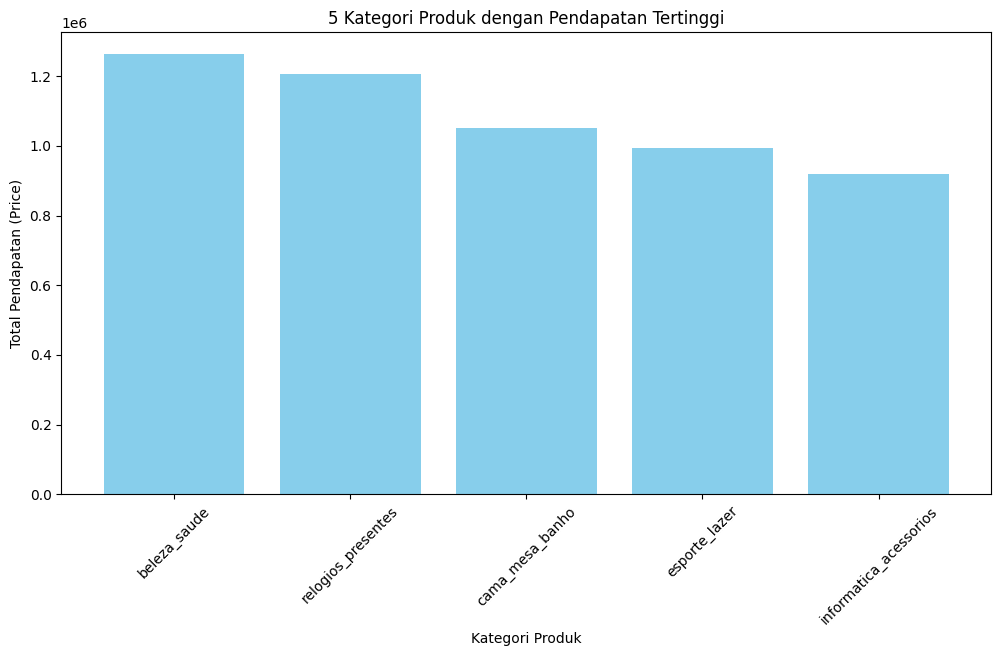

In [65]:
plt.figure(figsize=(12,6))
plt.bar(top_revenue_categories['product_category_name'][:5], top_revenue_categories['price'][:5], color='skyblue')
plt.xlabel("Kategori Produk")
plt.ylabel("Total Pendapatan (Price)")
plt.title("5 Kategori Produk dengan Pendapatan Tertinggi")
plt.xticks(rotation=45)
plt.show()

Produk mana yang memiliki skor review tertinggi?

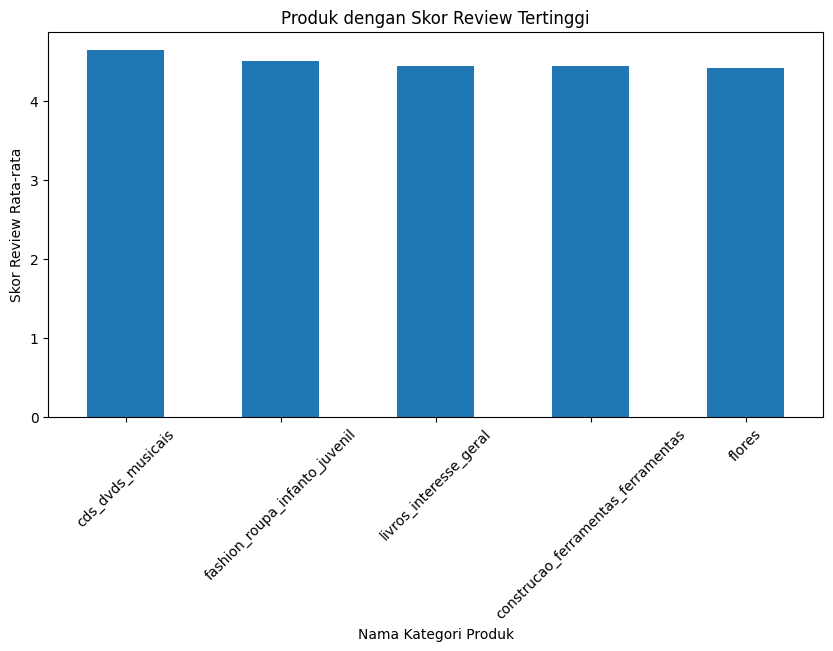

In [66]:
top_reviewed_products.head().plot(kind='bar', figsize=(10,5))
plt.xlabel("Nama Kategori Produk")
plt.ylabel("Skor Review Rata-rata")
plt.title("Produk dengan Skor Review Tertinggi")
plt.xticks(rotation=45)
plt.show()


Pada bulan apa terjadi peningkatan tertinggi dalam penjualan?

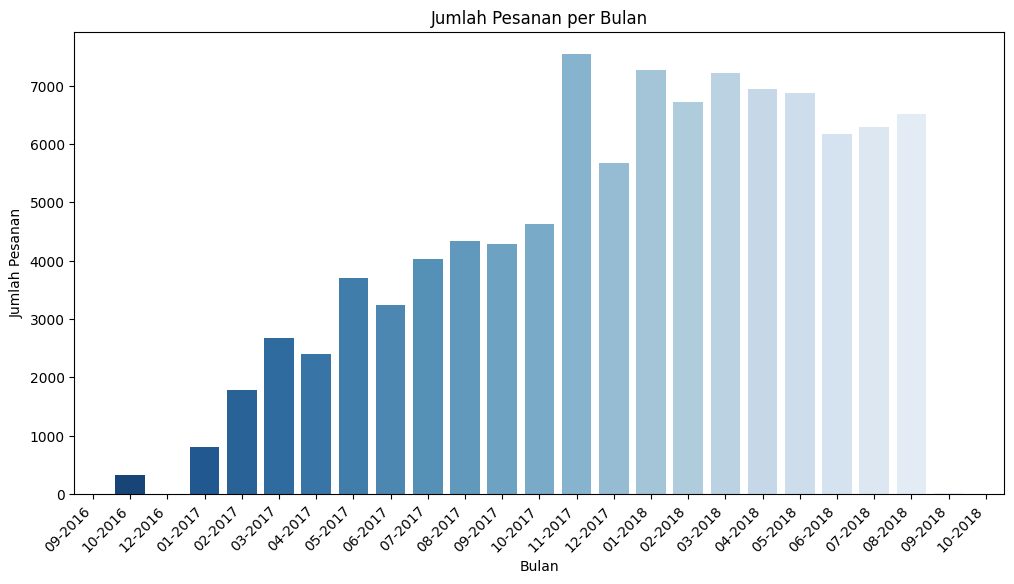

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_orders_df.index, y=monthly_orders_df["monthly_orders"], hue=monthly_orders_df.index, palette="Blues_r", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan per Bulan")
plt.show()

###Conclusion

*Kesimpulan*
- 5 Kategori Produk dengan Pendapatan Tertinggi yaitu beleza_saude memiliki total pendapatan tertinggi, diikuti oleh relogios_presentes, cama_mesa_banho, esporte_lazer, dan informatica_acessorios.
- Kategori produk dengan skor review rata-rata tertinggi adalah cds_dvds_musicais, diikuti oleh fashion_roupa_infanto_juvenil, livros_interesse_geral, construcao_ferramentas_ferramentas, dan flores.
-- Semua kategori ini memiliki skor rata-rata yang sangat tinggi (di atas 4.5), menunjukkan tingkat kepuasan pelanggan yang baik.
- Terjadi tren peningkatan jumlah pesanan dari September 2016 hingga awal 2018.
- Puncak jumlah pesanan terjadi sekitar akhir 2017 dan awal 2018.
- Setelah mencapai puncaknya, pesanan mulai mengalami sedikit penurunan pada pertengahan 2018.

*Rekomendasi Berdasarkan Hasil Analisis*
- Optimalisasi Produk dengan Pendapatan Tertinggi
-- Tingkatkan stok dan promosi pada kategori beleza_saude, relogios_presentes, cama_mesa_banho, esporte_lazer, dan informatica_acessorios untuk mempertahankan pendapatan tinggi.
-- Analisis lebih lanjut faktor yang mendorong penjualan tinggi pada kategori ini, seperti harga, diskon, atau loyalitas pelanggan.
- Strategi untuk Kategori dengan Review Tertinggi
-- Manfaatkan ulasan positif pada cds_dvds_musicais, fashion_roupa_infanto_juvenil, livros_interesse_geral, construcao_ferramentas_ferramentas, dan flores sebagai strategi pemasaran.
-- Dorong pelanggan untuk memberikan ulasan dan testimoni yang lebih banyak guna meningkatkan kepercayaan calon pembeli.
- Mengelola Tren Peningkatan dan Penurunan Pesanan
-- Perkuat strategi pemasaran menjelang akhir tahun untuk memanfaatkan tren peningkatan pesanan pada akhir 2017 dan awal 2018.
-- Tinjau penyebab penurunan pesanan di pertengahan 2018, apakah karena faktor musiman, persaingan, atau faktor eksternal lainnya.